# Exploratory Data Analysys

## Roles to explore:

In [1]:
# Importing libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Filter for Poland Data Analyst roles

In [3]:
df_DA_PL = df[(df['job_country']=='Poland') & (df['job_title_short']=='Data Analyst')]

## Most popular locations

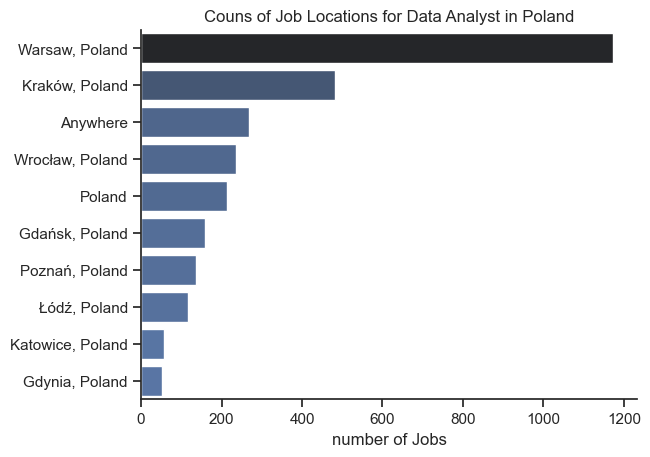

In [37]:
df_plot = df_DA_PL['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')

sns.barplot(data=df_plot, y='job_location', x='count', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Couns of Job Locations for Data Analyst in Poland')
plt.ylabel('')
plt.xlabel('number of Jobs')
plt.show()

## Additional benefits

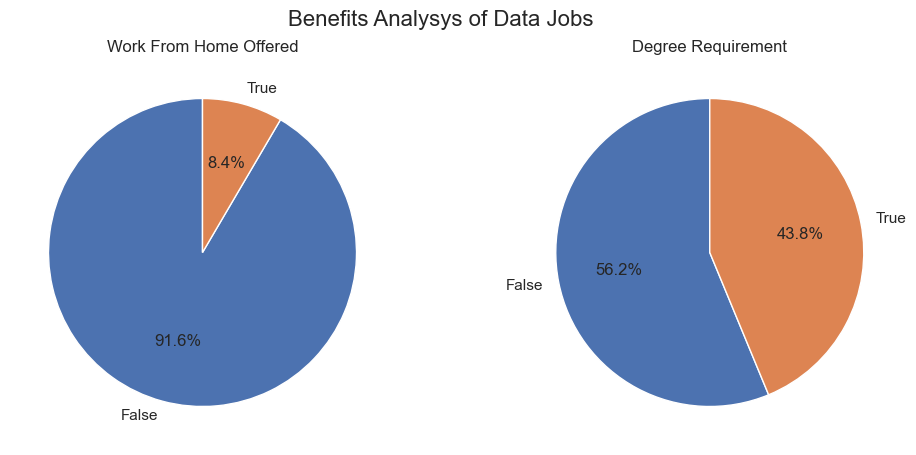

In [34]:
dict_column={
    'job_work_from_home': 'Work From Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
}

fig, ax = plt.subplots(1,2, figsize=(12,5))

for i, (column,title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_PL[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.suptitle('Benefits Analysys of Data Jobs', fontsize=16)
plt.show()

## Companies

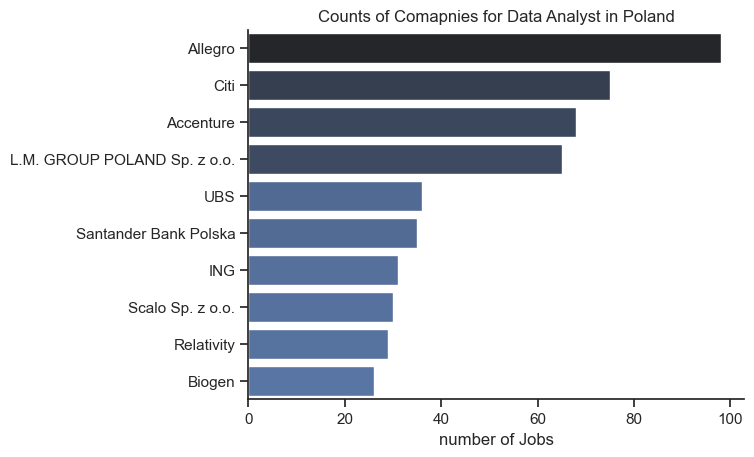

In [36]:
df_plot = df_DA_PL['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')

sns.barplot(data=df_plot, y='company_name', x='count', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Comapnies for Data Analyst in Poland')
plt.ylabel('')
plt.xlabel('number of Jobs')
plt.show()